# Final Project Submission

Please fill out:
* Student name: Bronwen Cohn-Cort
* Student pace: self-paced
* Scheduled project review date/time: Nov. 1 9-10 AM Eastern US
* Instructor name: Eli


My approach to the project through the OSEMN framework is to look at a few interesting columns on a detailed level and consider which variables from the whole dataset are most needed for a linear regression model to provide meaningful results.

## Obtain
I read in the CSV file and look at the types of data contained within, and some basic qualities of the data.

In [1]:
import pandas as pd
kc_data = pd.read_csv('kc_house_data.csv')
kc_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [2]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
print(kc_data["condition"].nunique())
kc_data["condition"].value_counts()

5


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [5]:
print(kc_data["grade"].nunique())
kc_data["grade"].value_counts()

11


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [7]:
print(kc_data["sqft_basement"].nunique())
kc_data["sqft_basement"].value_counts().head()

304


0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [8]:
print(kc_data["view"].nunique())
kc_data["view"].value_counts()

5


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
print(kc_data["zipcode"].nunique())
kc_data["zipcode"].value_counts().tail()

70


98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, dtype: int64

In [15]:
print(kc_data["id"].nunique())
kc_data["id"].value_counts().head()

21420


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

In [17]:
print(kc_data["yr_renovated"].nunique())
kc_data["yr_renovated"].value_counts().head()

70


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

## Scrub
I change the encoded types, create dummy variables, deal with nonsensical or missing values.

In [10]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

With `view` and `waterfront` being categorical columns containing several values of 0, null or missing, I will drop both.
Similarly, for `sqft_basement`, containing mainly 0 and 454 ? values.

In [13]:
#dropping view, waterfront, sqft_basement
drop_vwb = ["view","waterfront","sqft_basement"]
kc_data.drop(drop_vwb,axis=1,inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


Now the only column remaining with null values is `yr_renovated`.  Presumably these are newer houses that have never been renovated, but the most common value in the column is 0, which could also indicate a house has not been renovated.
With nearly all the values missing or 0, I will also drop the `yr_renovated` column.

In [19]:
kc_data.drop("yr_renovated",axis=1, inplace=True)
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
#id, grade, condition and zipcode should not be treated as numbers
kc_data["id"]=kc_data["id"].astype("str")
kc_data["condition"]=kc_data["condition"].astype("category")
kc_data["grade"]=kc_data["grade"].astype("category")
kc_data["zipcode"]=kc_data["zipcode"].astype("str")
#date should be a datetime object
kc_data["date"]=pd.to_datetime(kc_data["date"])
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
id               21597 non-null object
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(2), datetime64[ns](1), float64(5), int64(7), object(3)
memory usage: 2.7+ MB


In [23]:
kc_data.id.count()-kc_data.id.nunique()

177

As the `id` column has 177 repeated values, I would like to drop all of them such that I am only considering houses that were sold once within the timespan of the dataset.

In [24]:
#Looking at the top 10 repeating id's
kc_data.id.value_counts().head(10)

795000620     3
9353300600    2
5430300171    2
5536100020    2
1231000510    2
1219000473    2
1788800630    2
1423049019    2
3969300030    2
4139440480    2
Name: id, dtype: int64

The id that appears the most appears 3 times, and the second-most appears twice, which means the other repeated id's also appear only twice. I will make a list containing all those indices of id's that repeat.

In [26]:
id_indices=[]
for idx, num in enumerate(kc_data.id):#num is each id in the id column
    if idx==21596:
        break
    elif (num==kc_data.id[idx+1]):
        #assuming each repeated id follows the same pattern as the two I already looked at
        id_indices.append(idx)
        id_indices.append(idx+1)
        #a special case for the thrice-repeated id:
        if num==kc_data.id[idx+2]:
            id_indices.append(idx+2)

I will remove all of these rows with the indices contained in `id_indices`.

In [27]:
kc_data.drop(labels=id_indices,axis=0,inplace=True)
#checking there are no repeated id values
kc_data.id.count()-kc_data.id.nunique()

0

In [28]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 18 columns):
id               21244 non-null object
date             21244 non-null datetime64[ns]
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
condition        21244 non-null category
grade            21244 non-null category
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
zipcode          21244 non-null object
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
dtypes: category(2), datetime64[ns](1), float64(5), int64(7), object(3)
memory usage: 2.8+ MB


In [29]:
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.124400e+04,21244.000000,21244.000000,21244.000000,2.124400e+04,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000
mean,5.423012e+05,3.374694,2.121022,2085.942902,1.515673e+04,1.497882,1793.752871,1971.186876,47.560301,-122.213587,1990.133920,12793.135332
std,3.681265e+05,0.924476,0.768462,919.517305,4.164963e+04,0.540477,829.627388,29.398604,0.138625,0.140857,685.856874,27417.178614
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,47.471375,-122.328000,1490.000000,5100.000000
50%,4.510000e+05,3.000000,2.250000,1920.000000,7.606000e+03,1.500000,1570.000000,1975.000000,47.572500,-122.229000,1840.000000,7620.000000
75%,6.471250e+05,4.000000,2.500000,2557.750000,1.069725e+04,2.000000,2220.000000,1997.000000,47.678100,-122.124000,2370.000000,10089.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Explore
I look at histograms, scatter plots, and check for multicollinearity and see which potential predictors for price might need to be normalized, transformed, binned, or are highly correlated.

### Normality

<Figure size 864x1080 with 0 Axes>

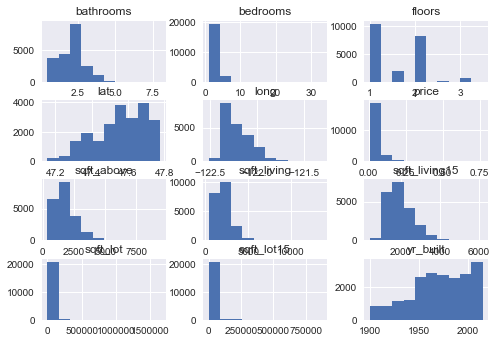

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
#looking at histograms for all columns
plt.style.use("seaborn")
plt.figure(figsize=(12,15))
kc_data.hist()
plt.show()

`yr_built` and `lat` appear to be right-skewed.
`long`, `sqft_above` and `sqft_living15` look similarly left-skewed.
`sqft_lot`, `sqft_lot15`, `price`, and `bedrooms` are highly left-skewed and have high kurtosis.
`bathrooms` also has high kurtosis, but is not far from a normal distribution.

### Linearity

I will now look at scatterplots to get a sense of the linearity of the columns.

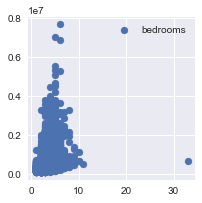

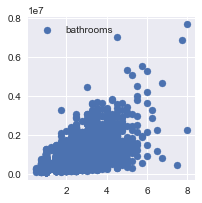

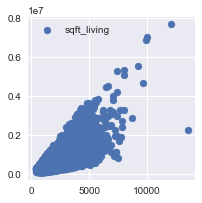

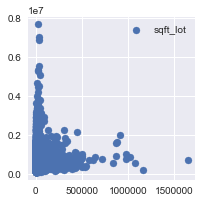

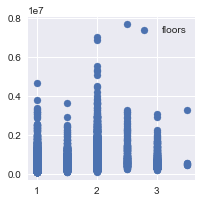

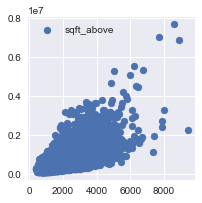

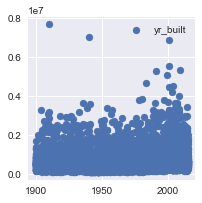

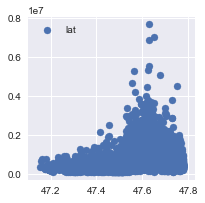

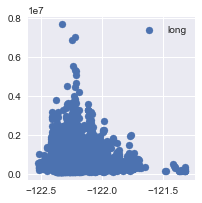

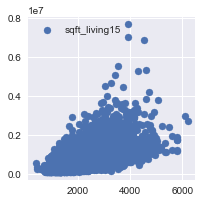

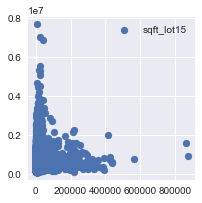

In [42]:
#creating a list of only the numeric values
cols = ['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'sqft_above',
 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col_name in cols:
    plt.figure(figsize=(3,3))
    plt.scatter(kc_data[col_name], kc_data["price"],label=col_name)
    plt.legend()
    plt.show()

Could be negatively correlated: `long`

Could be positively correlated, except for outliers: `bedrooms`,`lat`

Looks positively correlated, with some outliers: `bathrooms`, `sqft_living`, `sqft_above`,`sqft_living15`

Does not appear to have a linear relationship: `sqft_lot`, `yr_built`, `sqft_lot15`

Appears categorical: `floors`

### Multicollinearity
I will now determine to what degree values are correlated with each other.

In [43]:
import seaborn as sns
#if the absolute value of a correlation is more than .75, it is considered highly correlated
abs(kc_data.drop("price",axis=1).corr())>.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,False,True,False


The "True" values appear to be for `sqft_living` vs. `bathrooms`, `sqft_above` vs. `sqft_living` and `sqft_living` vs. `sqft_living15`.  As `sqft_living` is the value that appears to be highly correlated with three other variables, I will drop it in the next Scrub step.

### Conclusion of Explore Step:
- Drop the highly correlated `sqft_living` column
- Also drop the non-linear `sqft_lot`, `yr_built`, and `sqft_lot15`
- Change the `floors` variable to be categorical
- Reduce the skewness of `lat`, `long`, `sqft_above`, and `sqft_living15`
- Reduce the kurtosis and skew of `price`, `bedrooms`, and `bathrooms`
- Handle outliers from `bedrooms`, `lat`, `bathrooms`, `sqft_above`, and `sqft_living15`

### Question: How does the price vary with the date?
`date` is not shown on these plots, as it is an object.  I expect that houses may have different selling prices over the course of a year.

In the next Scrub step, I will add a column for day_of_year (1 to 365) to see in the subsequent Explore step how well it could predict house prices.

## Scrub 2
In the second go-around after looking at some visualizations, I wil one-hot encode categorical dummy columns, normalize data, remove outliers and drop columns that would not help a regression model.

In [44]:
#drop highly-correlated and likely non-linear columns
drop_lotlivb=["sqft_living","sqft_lot","yr_built","sqft_lot15"]
pred_df=kc_data.drop(drop_lotlivb,axis=1)
pred_df.head(3)

,id,date,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,3,7,1180,98178,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,3,7,2170,98125,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,3,6,770,98028,47.7379,-122.233,2720


In [46]:
#change floors to be categorical
pred_df["floors"]=pred_df["floors"].astype("category")
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 13 columns):
id               21244 non-null object
date             21244 non-null datetime64[ns]
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
floors           21244 non-null category
condition        21244 non-null category
grade            21244 non-null category
sqft_above       21244 non-null int64
zipcode          21244 non-null object
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
dtypes: category(3), datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 1.8+ MB


#### Log Transformations and Normalizations

The skewness in `lat`, `long`,`sqft_living15`, `sqft_above`, `price`, `bedrooms`, and `bathrooms` can be reduced by using a log transformation.

In [55]:
#long is entirely negative values, so I will multiply the column by -1
pred_df["long"]=pred_df["long"]*(-1)
pred_df.describe()

,price,bedrooms,bathrooms,sqft_above,lat,long,sqft_living15
count,2.124400e+04,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000
mean,5.423012e+05,3.374694,2.121022,1793.752871,47.560301,122.213587,1990.133920
std,3.681265e+05,0.924476,0.768462,829.627388,0.138625,0.140857,685.856874
min,7.800000e+04,1.000000,0.500000,370.000000,47.155900,121.315000,399.000000
25%,3.249500e+05,3.000000,1.750000,1200.000000,47.471375,122.124000,1490.000000
50%,4.510000e+05,3.000000,2.250000,1570.000000,47.572500,122.229000,1840.000000
75%,6.471250e+05,4.000000,2.500000,2220.000000,47.678100,122.328000,2370.000000
max,7.700000e+06,33.000000,8.000000,9410.000000,47.777600,122.519000,6210.000000


In [58]:
import numpy as np

pred_log = pd.DataFrame([])
pred_log["log_lat"] = np.log(pred_df["lat"])
pred_log["log_long"] = np.log(pred_df["long"])
pred_log["log_living15"] = np.log(pred_df["sqft_living15"])
pred_log["log_above"]=np.log(pred_df["sqft_above"])
pred_log["log_price"] = np.log(pred_df["price"])
pred_log["log_bed"] = np.log(pred_df["bedrooms"])
pred_log["log_bath"] = np.log(pred_df["bathrooms"])

The kurtosis of `price`, `bedrooms`, and `bathrooms` can be managed by using a log normalization.  As they have already been log-transformed, I will normalize `price` by using a standardization.

In [57]:
lprice=pred_log["log_price"]
scaled_price = (lprice-np.mean(lprice))/np.sqrt(np.var(lprice))

The effect of outliers in `bedrooms`, `lat`, `bathrooms`, `sqft_above`, and `sqft_living15` can be suppressed by using a min-max scaling.

In [59]:
lbed=pred_log["log_bed"]
llat=pred_log["log_lat"]
lbath=pred_log["log_bath"]
labove=pred_log["log_above"]
ll15=pred_log["log_living15"]


scaled_bed = (lbed-min(lbed))/(max(lbed)-min(lbed))
scaled_lat = (llat-min(llat))/(max(llat)-min(llat))
scaled_bath = (lbath-min(lbath))/(max(lbath)-min(lbath))
scaled_above = (lbed-min(labove))/(max(labove)-min(labove))
scaled_l15 = (lbed-min(ll15))/(max(ll15)-min(ll15))

In [60]:
#add newly-transformed variables to a new dataframe
scaled_df = pd.DataFrame([])
scaled_df["price"]=scaled_price
scaled_df["lat"]=scaled_lat
scaled_df["long"]=pred_log["log_long"]
scaled_df["bathrooms"]=scaled_bath
scaled_df["bedrooms"]=scaled_bed
scaled_df["sqft_above"]=scaled_above
scaled_df["sqft_living15"]=scaled_l15

In [48]:
cat_names=["floors","condition","grade","zipcode"]
for col in cat_names:
    print(pred_df[col].nunique())

6
5
11
70


An OLS regression model could use one-hot-encoded dummy variables for categorical variables.  However, `zipcode` would add almost 70 columns to the dataset, which would increase the runtime of the model.

Taking this into consideration, I will drop the zipcode column and only perform one-hot-encoding for the `floors`, `condition`, and `grade` columns.

In [61]:
#dropping zipcode column
pred_df.drop("zipcode",axis=1,inplace=True)

In [73]:
#creating dummy variables for floors, conditions and grade
fl_dummies = pd.get_dummies(pred_df["floors"],prefix="flrs")
co_dummies = pd.get_dummies(pred_df["condition"],prefix="cond")
gr_dummies=pd.get_dummies(pred_df["grade"],prefix="grade")

Index(['grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [74]:
#combine dummies into dataframe as columns
dummy_df = pd.concat([fl_dummies,co_dummies,gr_dummies], axis=1)
dummy_df.head()

,flrs_1.0,flrs_1.5,flrs_2.0,flrs_2.5,flrs_3.0,flrs_3.5,cond_1,cond_2,cond_3,cond_4,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
#new DataFrame with dummy columns, transformed values, and date as day_of_year
date_as_day=pred_df["date"].dt.dayofyear
pred2_df=pd.concat([scaled_df,date_as_day,dummy_df],axis=1)
pred2_df.head()

,price,lat,long,bathrooms,bedrooms,sqft_above,sqft_living15,date,flrs_1.0,flrs_1.5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-1.417865,0.573100,4.806125,0.250000,0.314203,-1.487903,-1.781577,286,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.272201,0.909499,4.806632,0.542481,0.314203,-1.487903,-1.781577,343,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.817218,0.936533,4.805929,0.250000,0.198240,-1.613200,-1.929290,56,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0.493023,0.588526,4.807237,0.646241,0.396480,-1.399003,-1.676773,343,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.170205,0.742607,4.804390,0.500000,0.314203,-1.487903,-1.781577,49,1,0,...,0,0,0,0,1,0,0,0,0,0


## Explore 2
I will look again at multicollinearity and double-check the data meets assumptions of normality, linearity and heteroscedasticity sufficiently for regression.

In [ ]:
pred2_df.describe()

In [ ]:
pred_cols = ["lat","long","bathrooms","bedrooms","sqft_living15","date"]

In [ ]:
import seaborn as sns
for col_name in pred_cols:#using only continuous variables
    sns.jointplot(x= col_name, y= 'price', data=pred2_df, kind="reg",label=col_name)
    plt.show()

### Question: Does a house located near another house for sale have a higher price?

Null hypothesis: A house located within .01 latitude or longitude of another house has a sale price for an insignificantly different amount of money. (.01 degree of longitude at the latitude 47$^o$ is equivalent to x kilometers/meters . . .)
Alternate hypothesis: Proximity to other houses that sold significantly increases or decreases the sale price of a house.

More than one column indicates where a house is located: `zipcode`, and `lat` and `long`. `lat` and `long` would be more precise measures of distance, but I will determine whether any have a correlation to price.

In [ ]:
import math
def pyth(x1,y1,x2,y2):
    x=x2-x1
    y=y2-y1
    return math.sqrt((x**2)+(y**2))

pyth(1,2,4,6)#testing function

First, I'll look at the scatterplot of the latitude and longitude values.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = loc_df.long
y = loc_df.lat
plt.style.use("seaborn")
plt.scatter(x,y)
plt.show()

In [ ]:
#creating a shortest distance column
loc_df["distance"]=0

In [ ]:
#generating the values for the distance column
vals=len(loc_df.lat)
dist=pyth(min(loc_df.lat),min(loc_df.long),max(loc_df.lat),max(loc_df.long))#the farthest away any two could be

for i in range(0,vals):#cycling through the DataFrame
        lat1=loc_df.loc[i,"lat"]
        long1=loc_df.loc[i,"long"]
        #taking the ith lat and long values
                
        for j in range(0,vals):
            if i == j:#not look at where i=j
                continue#on to next value of j
            lat2=loc_df.loc[j,"lat"]
            long2=loc_df.loc[j,"long"]
            new_dist=pyth(lat1,long1,lat2,long2)
            dist=min(dist,new_dist)#comparing newly-calculated distance and selecting the smaller
        
        loc_df.loc[i,"distance"]=dist
        if i == 30:
            print("made it to 30!")
        elif i == 600:
            print("this is 600")
        elif i==1100:
            print("still going at 1100")
        elif i ==2000:
            print("home stretch at 2000")
#NB: this could take more than a few minutes

In [ ]:
loc_df.describe()

In [ ]:
loc_600.hist(figsize=(15,12))#was for the first 600 rows

## Model
I use RFE and OLS to see which columns from the dataset best predict price.

## Interpret
A concluding paragraph of how my model predicts house prices in the dataset.

My final model is like this:

The three coefficients that impact the price of a house in the King County dataset in these ways: